In [1]:
import os
import pandas as pd

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [3]:
df = pd.read_csv("all_data_copy.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape

(186850, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning Data: Removing Null Values and other faulty rows

In [6]:
pd.isnull(df).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(186305, 6)

In [9]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Adding Months Column

In [10]:
df['month'] = df['Order Date'].str[0:2].copy()
df['month'] = df['month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding total sales column

In [11]:
# converting quantity and price columns to numeric type for multiplication
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered']) #make int
df['Price Each']=pd.to_numeric(df['Price Each']) # make float

df['Total Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding a City column

In [12]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + '(' + x.split(',')[2].split(' ')[1] + ')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Performing Exploratory Data Analysis

### Question 1: Finding total sales each month and the month with maximum sales.

In [25]:
monthly = df.groupby('month')[['Quantity Ordered', 'Total Sales']].sum()
monthly

,Quantity Ordered,Total Sales
month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


In [15]:
# Total rows and columns after removing null and faulty rows and adding 2 extra columns
df.shape

(185950, 9)

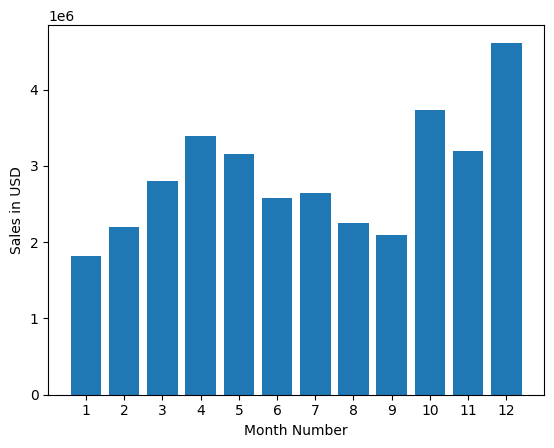

In [26]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month, monthly['Total Sales'])
plt.xticks(month)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

### Question 2: What city had the highest number of sales?

In [17]:
monthly = df.groupby('City')[['Quantity Ordered', 'Price Each', 'month', 'Total Sales']].sum()
monthly

,Quantity Ordered,Price Each,month,Total Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


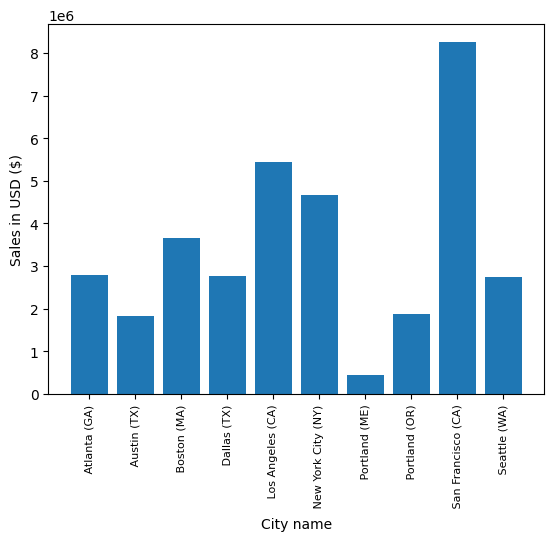

In [22]:
import matplotlib.pyplot as plt

keys = [city for city, df in df.groupby('City')]

plt.bar(keys, monthly['Total Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### Question 3: Best time to display advertisement to maximise the sale of the product.

In [53]:
# First, we convert the Order date column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [54]:
# Now we get the hour and minutes column out of order-date column
df['Hour'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [54]:
# Finding total products sold each hour
# applying group by and size/count function on 'Hour' column to group by data for each hour and count total orders for each hour
# size is more efficient function than count as it counts total rows (orders) per hour 
# whereas df.groupby('Hour').count() returns a DataFrame, NOT a single count. It counts non-null values per column, not total orders.

df.groupby('Hour').size()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64

In [51]:
# x-axis getting each hour using index
df.groupby('Hour').size().index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Hour')

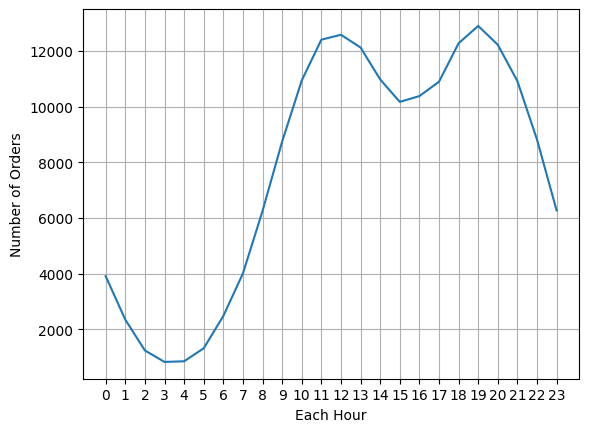

In [55]:
hours = df.groupby('Hour').size().index
orders = df.groupby('Hour').size()

plt.plot(hours, orders)
plt.xlabel('Each Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

### Question 4: What products sold the most and why?

In [56]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [47]:
# sum up the quantity ordered after group by each product - to get total quantity ordered of each product
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

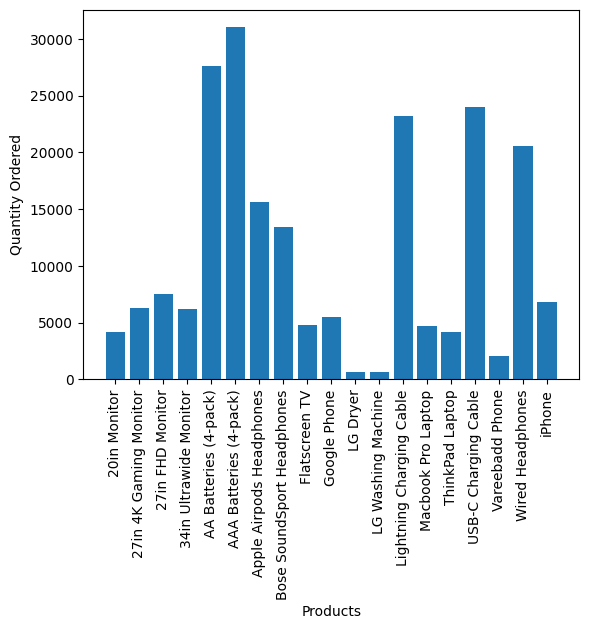

In [50]:
import matplotlib.pyplot as plt
# y index
product_count = df.groupby('Product')['Quantity Ordered'].sum()
plt.ylabel('Quantity Ordered')

# x axis
products = product_count.index
plt.xlabel('Products')

plt.bar(products, product_count)
plt.xticks(products, rotation='vertical')
plt.show()

In [30]:
prices = df.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


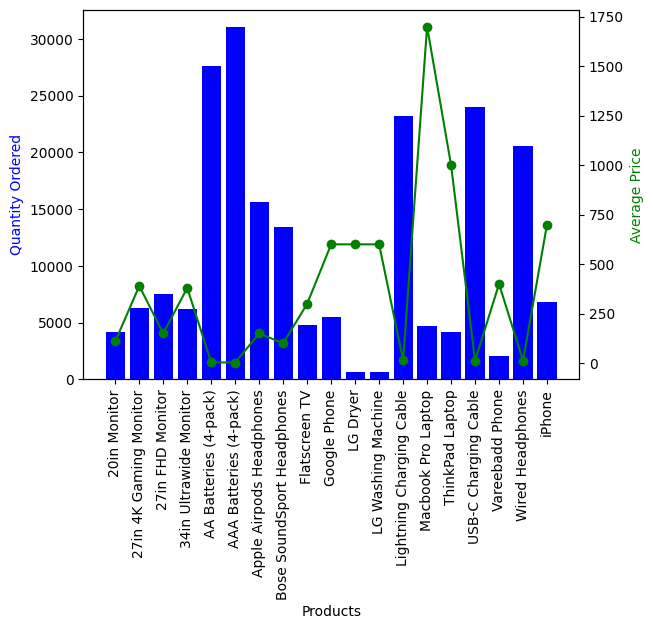

In [52]:
# Plotting a graph to visualize the relationship between sales volume and the product pricing on the same chart for each product 
# using a secondary Y-axis with the twinx() function, to compare demand against pricing.

fig, ax1 = plt.subplots()

# First Y-axis (Quantity)
ax2 = ax1.twinx()
ax1.bar(products, Quantity_Ordered, color='b')
# Second Y-axis (Avg Price)
ax2.plot(products, prices, marker='o', color='g')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Average Price',  color='g')
ax1.tick_params(axis='x', rotation=90)

plt.show()

## Insights gathered from analyzing the data:

### 1. Monthly data Insights

The graph for monthly sales depicts higher sales in April, October, and December, indicating increased sales around the festival months of Christmas and Thanksgiving.

### 2. City-wise sales distribution

Cities like San Francisco (CA) and Los Angeles (CA) had the maximum sales, while Portland (ME) had the minimum sales output compared to the remaining cities in the US.

### 3. Optimal Time for Advertisements

Customer buying behavior varies significantly throughout the day.

Order volume shows a clear peak during mid day hours of the day around 11 am to 12 pm, and later evening hours specifically at 7 pm, indicating high customer activity.

These peak hours represent the best time to display advertisements to maximize visibility and conversion.

Running ads during low-activity hours would result in lower ROI.

This indicates that timing plays a crucial role in purchasing decisions as well as marketing techniques.

### 4. Price vs Quantity Relationship

Products with lower prices tend to sell in higher quantities, indicating price sensitivity among customers. Example AA and AAA batteries are the most sold items with lowest average prices.

Higher-priced products like macbooks and laptops, sell fewer units but may still contribute significantly to revenue.

I used a secondary Y-axis using twinx() to visualize both sales volume and product pricing on the same chart. This helps compare demand against pricing, enabling better business insights.